In [89]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt


In [90]:
tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOG', 'EBAY', 'NFLX', 'TSLA']
etfs = ['SPY', 'IWM', 'DIA']

tickers.sort()


In [91]:
data = yf.download(tickers + etfs, period = "11y")['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [92]:
data

,AAPL,AMZN,DIA,EBAY,GOOG,IWM,MSFT,NFLX,SPY,TSLA
Date,,,,,,,,,,
2012-10-03,20.441837,12.796000,106.305679,18.953621,18.991316,71.792625,24.255545,8.940000,118.340385,1.953333
2012-10-04,20.300264,13.023500,106.968727,19.304688,19.129547,72.281883,24.393642,9.524286,119.188606,1.960000
2012-10-05,19.867662,12.925500,107.316040,19.008230,19.119585,72.196053,24.247427,9.508571,119.196793,1.926000
2012-10-08,19.428642,12.953000,107.071373,18.692272,18.875252,71.741112,24.190565,10.502857,118.788971,1.950000
2012-10-09,19.358017,12.548000,106.234665,18.029154,18.532785,70.899910,23.784403,9.361429,117.614464,1.891333
...,...,...,...,...,...,...,...,...,...,...
2023-09-26,171.960007,125.980003,336.040009,43.490002,129.449997,174.360001,312.140015,379.250000,425.880005,244.119995
2023-09-27,170.429993,125.980003,335.429993,42.889999,131.460007,175.990005,312.790009,377.589996,426.049988,240.500000
2023-09-28,170.690002,125.980003,336.619995,43.650002,133.130005,177.580002,313.640015,376.359985,428.519989,246.380005


Creating the table showing constituent (stocks) risk analysis in the equal-weight portfolio analysis as of the
current date: 

In [93]:
portfolio = pd.DataFrame(index=tickers)
portfolio

""
AAPL
AMZN
EBAY
GOOG
MSFT
NFLX
TSLA


In [94]:
#Equally weighted portfolio divided among 7 stocks (as a percent)

n = len(tickers)
portfolioWeight = (100/n) 

portfolio['Porfolio Weight (%)'] = portfolioWeight
portfolio

,Porfolio Weight (%)
AAPL,14.285714
AMZN,14.285714
EBAY,14.285714
GOOG,14.285714
MSFT,14.285714
NFLX,14.285714
TSLA,14.285714


In [95]:
#Annualized Volatiity of trailing 3 months of trading days, meaning 63 days
#Formula = (standard deviation of data) * (square root of 252)

portfolio['Annualized Volatility'] = data.pct_change()[-63:].std() * (252 ** (1/2))
portfolio

,Porfolio Weight (%),Annualized Volatility
AAPL,14.285714,0.214583
AMZN,14.285714,0.319355
EBAY,14.285714,0.303191
GOOG,14.285714,0.259305
MSFT,14.285714,0.219719
NFLX,14.285714,0.343596
TSLA,14.285714,0.487383


In [96]:
##Beta against SPY using trailing 12 months 
#Log Returns measure the relative change in the value of an asset 
#https://saturncloud.io/blog/what-are-logarithmic-returns-and-how-to-calculate-them-in-pandas-dataframe/#:~:text=Logarithmic%20returns%2C%20also%20known%20as,the%20value%20of%20an%20asset.
#Beta Formula: Beta = covariance / variance

####Originally had it as this, which runs but is far more complex than necessary

# log_returns = np.log(data/data.shift()).dropna()
# covariance = log_returns.cov()
# variance = log_returns['SPY'].var()

# portfolio['Beta Against SPY'] = covariance.loc['SPY'] / variance 
# portfolio

##Beta against IWM using trailing 12 months

# log_returns = np.log(data/data.shift()).dropna()
# covariance = log_returns.cov()
# variance = log_returns['IWM'].var()

# portfolio['Beta Against IWM'] = covariance.loc['IWM'] / variance 
# portfolio

##Beta against DIA using trailing 12 months

# log_returns = np.log(data/data.shift()).dropna()
# covariance = log_returns.cov()
# variance = log_returns['DIA'].var()

# portfolio['Beta Against DIA'] = covariance.loc['DIA'] / variance 
# portfolio

#####CHANGED Beta columns to the following code after seeing Professor Droescher 
#show us a better and simpler way to go about it:

x = data.pct_change() #where x is the returns but I use returns again later and didn't want to affect the code negatively

for etf in etfs:
    portfolio['Beta Against ' + etf] = x[-252:].cov()[etf] / x[-252:][etf].var()

portfolio

,Porfolio Weight (%),Annualized Volatility,Beta Against SPY,Beta Against IWM,Beta Against DIA
AAPL,14.285714,0.214583,1.334567,0.844526,1.351461
AMZN,14.285714,0.319355,1.526898,0.987085,1.326142
EBAY,14.285714,0.303191,1.211430,0.950508,1.338237
GOOG,14.285714,0.259305,1.388398,0.811754,1.229865
MSFT,14.285714,0.219719,1.371590,0.763841,1.313320
NFLX,14.285714,0.343596,1.404645,0.939583,1.355467
TSLA,14.285714,0.487383,1.761697,1.288760,1.418723


In [97]:
#Maximum Weekly Drawdown (52-week Low minus 52-week High) / 52-week High
#had help from: https://www.youtube.com/watch?v=RMyhDrG89D4 and https://www.codingfinance.com/post/2018-04-03-calc-returns-py/

def drawdown(stock): 
    weekly_returns = stock.resample('7D').ffill()
    rolling_max = weekly_returns.rolling(window=52,min_periods=1).max() 
    return (weekly_returns - rolling_max)/rolling_max 

portfolio['Avg Weekly Drawdown'] = [(drawdown(data[ticker])).mean() for ticker in tickers]
portfolio['Max Weekly Drawdown'] = [(drawdown(data[ticker])).min() for ticker in tickers]
portfolio

,Porfolio Weight (%),Annualized Volatility,Beta Against SPY,Beta Against IWM,Beta Against DIA,Avg Weekly Drawdown,Max Weekly Drawdown
AAPL,14.285714,0.214583,1.334567,0.844526,1.351461,-0.096151,-0.397005
AMZN,14.285714,0.319355,1.526898,0.987085,1.326142,-0.101114,-0.518826
EBAY,14.285714,0.303191,1.211430,0.950508,1.338237,-0.110242,-0.514097
GOOG,14.285714,0.259305,1.388398,0.811754,1.229865,-0.073965,-0.415955
MSFT,14.285714,0.219719,1.371590,0.763841,1.313320,-0.052783,-0.352133
NFLX,14.285714,0.343596,1.404645,0.939583,1.355467,-0.143033,-0.759473
TSLA,14.285714,0.487383,1.761697,1.288760,1.418723,-0.173005,-0.694337


In [98]:
#Total return using trailing 10 years
#Formula = (final price - initial price) / (initial price)

totalReturn = (data.iloc[-1] - data.iloc[252])/data.iloc[252]
portfolio['Total Return'] = totalReturn
portfolio

,Porfolio Weight (%),Annualized Volatility,Beta Against SPY,Beta Against IWM,Beta Against DIA,Avg Weekly Drawdown,Max Weekly Drawdown,Total Return
AAPL,14.285714,0.214583,1.334567,0.844526,1.351461,-0.096151,-0.397005,10.428657
AMZN,14.285714,0.319355,1.526898,0.987085,1.326142,-0.101114,-0.518826,7.351450
EBAY,14.285714,0.303191,1.211430,0.950508,1.338237,-0.110242,-0.514097,1.045921
GOOG,14.285714,0.259305,1.388398,0.811754,1.229865,-0.073965,-0.415955,5.268702
MSFT,14.285714,0.219719,1.371590,0.763841,1.313320,-0.052783,-0.352133,10.539873
NFLX,14.285714,0.343596,1.404645,0.939583,1.355467,-0.143033,-0.759473,7.367834
TSLA,14.285714,0.487383,1.761697,1.288760,1.418723,-0.173005,-0.694337,19.615065


In [99]:
#Annualized Total Return 
#Formula = (final price / initial price)^(1/n) - 1, where n is the number of years you held the investment
#in this case, n = 10 because of trailing 10 years

ann_total_return = (data.iloc[-1] / data.iloc[252])**(1/10) - 1
portfolio['Annualized Total Return'] = ann_total_return
portfolio

,Porfolio Weight (%),Annualized Volatility,Beta Against SPY,Beta Against IWM,Beta Against DIA,Avg Weekly Drawdown,Max Weekly Drawdown,Total Return,Annualized Total Return
AAPL,14.285714,0.214583,1.334567,0.844526,1.351461,-0.096151,-0.397005,10.428657,0.275850
AMZN,14.285714,0.319355,1.526898,0.987085,1.326142,-0.101114,-0.518826,7.351450,0.236449
EBAY,14.285714,0.303191,1.211430,0.950508,1.338237,-0.110242,-0.514097,1.045921,0.074209
GOOG,14.285714,0.259305,1.388398,0.811754,1.229865,-0.073965,-0.415955,5.268702,0.201483
MSFT,14.285714,0.219719,1.371590,0.763841,1.313320,-0.052783,-0.352133,10.539873,0.277086
NFLX,14.285714,0.343596,1.404645,0.939583,1.355467,-0.143033,-0.759473,7.367834,0.236691
TSLA,14.285714,0.487383,1.761697,1.288760,1.418723,-0.173005,-0.694337,19.615065,0.353376


Create a table showing Portfolio Risk against the three ETFs:

In [100]:
portfolio_etfs = pd.DataFrame(index=etfs)
portfolio_etfs 

""
SPY
IWM
DIA


In [101]:
#Correlation against ETF
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html 

portfolioCorr = (data[tickers].pct_change() * portfolioWeight).sum(axis=1)
portfolioCorr = portfolioCorr.rename("Portfolio")
returns = pd.concat([data.pct_change(), portfolioCorr], axis = 1)

corr_matrix = returns[252:].corr(method="pearson")

portfolio_etfs['Correlation against ETF'] = [corr_matrix['Portfolio'][etf] for etf in etfs]

portfolio_etfs


,Correlation against ETF
SPY,0.809507
IWM,0.682968
DIA,0.700567


In [102]:
#Covariance against ETF

cov_data = returns[252:].cov()

portfolio_etfs['Covariance against ETF'] = [cov_data['Portfolio'][etf] for etf in etfs]

portfolio_etfs

,Correlation against ETF,Covariance against ETF
SPY,0.809507,0.014424
IWM,0.682968,0.015244
DIA,0.700567,0.012421


In [103]:
#Tracking errors using trailing 10 years
#https://www.youtube.com/watch?v=n5TqRGu62vQ
#Formula = standard deviation of (stock return - benchmark return)
#using the returns variable already created previously, which represents the equally weighted portfolio

portfolio_etfs['Tracking Errors'] = [(returns['Portfolio'] - returns[etf]).std() for etf in etfs]
portfolio_etfs


,Correlation against ETF,Covariance against ETF,Tracking Errors
SPY,0.809507,0.014424,1.580038
IWM,0.682968,0.015244,1.579513
DIA,0.700567,0.012421,1.581253


In [104]:
#Sharpe Ratio (using current risk free rate)
#Formula: Sharpe Ratio = (Rx - Rf) / StdDev(Rx)
#Rx = average rate of return of x, Rf = risk-free rate

portfolio_etfs['Sharpe Ratio'] = [(returns['Portfolio'].mean() - returns[etf].mean())/(returns['Portfolio'].std()) for etf in etfs]

portfolio_etfs

,Correlation against ETF,Covariance against ETF,Tracking Errors,Sharpe Ratio
SPY,0.809507,0.014424,1.580038,0.076932
IWM,0.682968,0.015244,1.579513,0.077002
DIA,0.700567,0.012421,1.581253,0.076964


In [105]:
#Annualized Volatility Spread
#portfolio volatility - etf volatility

portfolio_etfs['Annualized Volatility'] = [(returns['Portfolio'][252:].std())*(252**(1/2)) - ((returns[etf][252:].std())*(252**(1/2))) for etf in etfs]

portfolio_etfs

,Correlation against ETF,Covariance against ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility
SPY,0.809507,0.014424,1.580038,0.076932,25.483232
IWM,0.682968,0.015244,1.579513,0.077002,25.439017
DIA,0.700567,0.012421,1.581253,0.076964,25.484099


Create a correlation matrix showing the correlations between the equal-weighted portfolio, 3 ETFs, and
your 7 stocks:

Text(0.5, 1.0, 'Correlation Matrix')

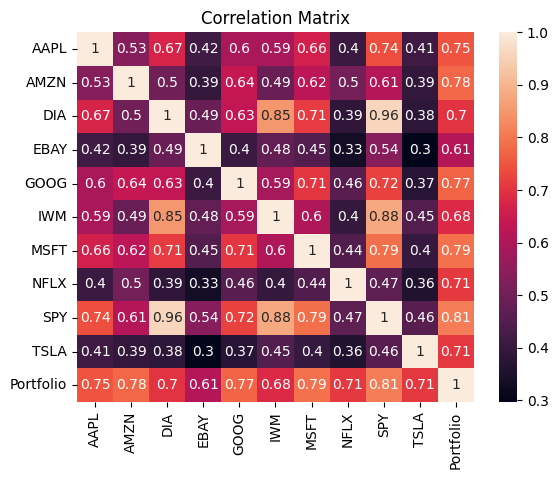

In [106]:
sns.heatmap(returns[252:].corr(), annot=True)

plt.title("Correlation Matrix")